In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,y,X
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0
...,...,...
8755,1003,4.2
8756,764,3.4
8757,694,2.6
8758,712,2.1


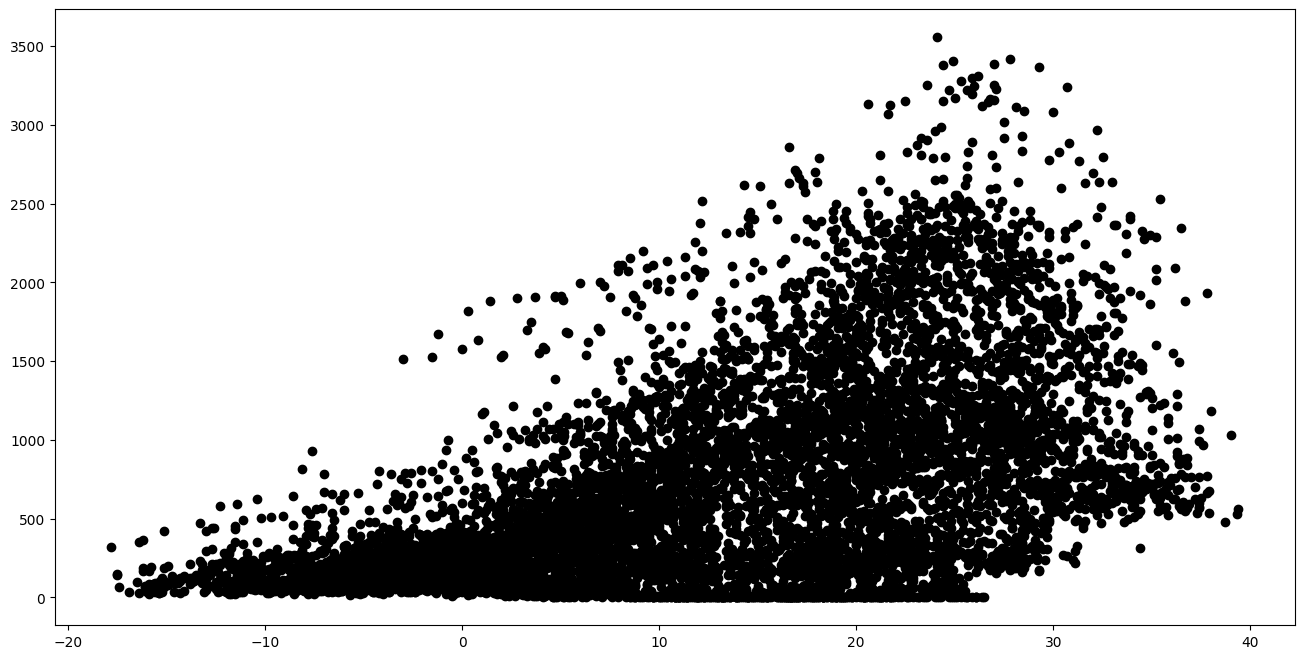

In [3]:
data = df[['Rented Bike Count', 'Temperature(°C)']]
data.columns = ['y', 'X']
display(data)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['X'],
    data['y'],
    c='black'
)

In [4]:
for i in range(2,16):
    colname = 'X_{}'.format(i)
    data.loc[:, colname] = data.loc[:, 'X']**i
data.head()

C:\Users\lucar\AppData\Local\Temp\ipykernel_31268\181637285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, colname] = data.loc[:, 'X']**i
C:\Users\lucar\AppData\Local\Temp\ipykernel_31268\181637285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, colname] = data.loc[:, 'X']**i
C:\Users\lucar\AppData\Local\Temp\ipykernel_31268\181637285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,y,X,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,254,-5.2,27.04,-140.608,731.1616,-3802.04032,19770.609664,-102807.170253,5.345973e+05,-2.779906e+06,1.445551e+07,-7.516866e+07,3.908770e+08,-2.032560e+09,1.056931e+10,-5.496043e+10
1,204,-5.5,30.25,-166.375,915.0625,-5032.84375,27680.640625,-152243.523438,8.373394e+05,-4.605367e+06,2.532952e+07,-1.393123e+08,7.662179e+08,-4.214198e+09,2.317809e+10,-1.274795e+11
2,173,-6.0,36.00,-216.000,1296.0000,-7776.00000,46656.000000,-279936.000000,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09,-1.306069e+10,7.836416e+10,-4.701850e+11
3,107,-6.2,38.44,-238.328,1477.6336,-9161.32832,56800.235584,-352161.460621,2.183401e+06,-1.353709e+07,8.392994e+07,-5.203656e+08,3.226267e+09,-2.000285e+10,1.240177e+11,-7.689097e+11
4,78,-6.0,36.00,-216.000,1296.0000,-7776.00000,46656.000000,-279936.000000,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09,-1.306069e+10,7.836416e+10,-4.701850e+11


In [5]:
data.shape

(8760, 16)

In [6]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power):
    # Initialize predictors:
    predictors = ['X']
    if power >= 2:
        predictors.extend(['X_{}'.format(i) for i in range(2, power+1)])

    # Fit the model:
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    linreg = LinearRegression()
    linreg.fit(data_scaled, data['y'])
    y_pred = linreg.predict(data_scaled)

    #Check if a plot is to be made for the entered power:
    models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['X'], data['y'], '.')
        plt.plot(data['X'], y_pred)
        plt.title('Plot for power: {}'.format(power))

    #Return the result in pre-defined format:
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [7]:
col = ['rss', 'intercept'] + ['coeff_X_{}'.format(i) for i in range(1,16)]
ind = ['model_pow_{}'.format(i) for i in range(1,16)]
coeff_matrix_simple = pd.DataFrame(index=ind, columns=col)

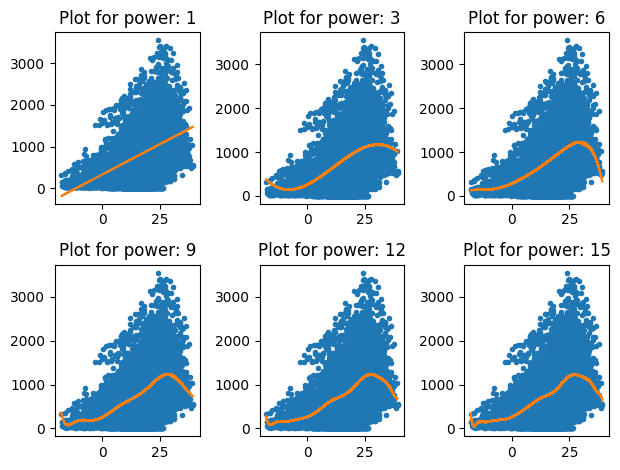

In [8]:
for i in range(1,16):
    coeff_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(data, power=i)